In [0]:
#Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
 
#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
 
from google.colab.patches import cv2_imshow

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


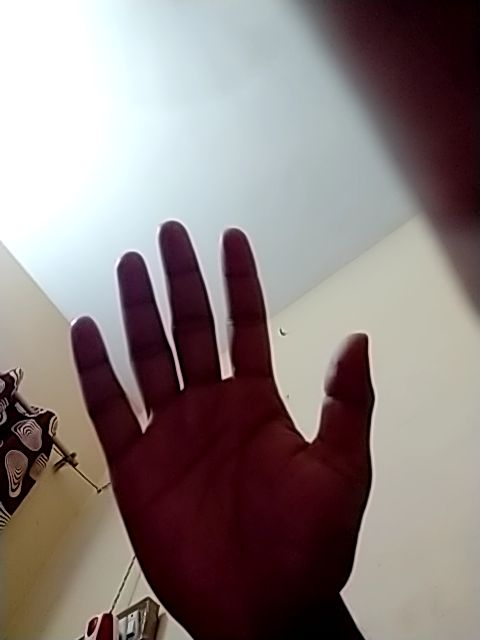

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [95]:
model1 = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/gesture_detection/DATA1_mod1.h5')
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 128)      

In [0]:
def predict1(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (128,128))
  plt.imshow(img)
  X = np.array(img)
  X = X.reshape(1,128, 128, 1)
  y_pred=np.argmax(model1.predict(X))
  symbol=dict({0:'palm down',
             1:'palm up',
             2:'L shape',
             3:'fist front',
             4:'fist side',
             5:'thumb',
             6:'index',
             7:'ok',
             8:'palm vertical',
             9:'c shape'})
  print(symbol[y_pred])

palm down


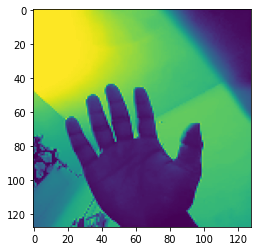

In [0]:
img=cv2.imread('/content/photo.jpg')
predict1(img)

In [97]:
model2 = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/gesture_detection/DATA1_mod2.h5')
model2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [0]:
def predict2(img):
  img = cv2.resize(img, (224,224))
  plt.imshow(img)
  X = np.array(img)
  X = X.reshape(1,224, 224, 3)
  y_pred=np.argmax(model2.predict(X))
  symbol=dict({0:'palm down',
             1:'palm up',
             2:'L shape',
             3:'fist front',
             4:'fist side',
             5:'thumb',
             6:'index',
             7:'ok',
             8:'palm vertical',
             9:'c shape'})
  print(symbol[y_pred])

fist side


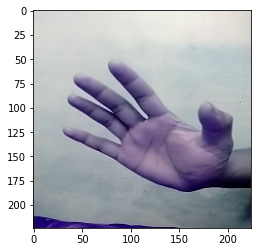

In [0]:
img=cv2.imread('/content/photo.jpg')
predict2(img)